AI in market trend analysis.

Problem Statement : To create an AI model to identify the trending food in a particular city and help in managing the inventory of a shop.

Many startups in food business face problem of deciding the particular type of cuisines or food products to be served by their business and managing the inventory of their shop to gain more and more profit.

Dataset is downloaded from the public source 'Kaggle website'.

Downloaded the data https://drive.google.com/drive/u/0/home

In [1]:
# Data loading and exploration

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filepath = r"D:\IIT minor in AI\Food_Data2.csv"
df = pd.read_csv(filepath)

print(df.head())

print(df.info())
print(df.describe())
print(df.isnull())


    order_id        order_time       city cuisine_type  order_value  \
0  ORD100185  01-01-2025 17:34    Chennai       Bakery       712.44   
1  ORD100171  03-01-2025 00:16    Chennai       Bakery      1086.44   
2  ORD100436  05-01-2025 15:06  Ahmedabad       Bakery       120.23   
3  ORD100308  05-01-2025 15:42  Ahmedabad       Bakery       595.92   
4  ORD100086  12-01-2025 19:14    Kolkata       Bakery       183.45   

   delivery_time_minutes payment_method  items_count  
0                     72           Cash            1  
1                     34           Cash            7  
2                     73            UPI            3  
3                     46         Wallet            5  
4                     47    Credit Card            2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               500 non

Model/System Design:
To build the AI model, Linear Regression which is ML technique is used. 

This model is trained on the available dataset. Model is fit on the dataset and make predictions on the given input from dataset.It tries to linearly fit the datapoints. By comparing the predicteed value by model with the actual value from the dataset our model is evaluated using the R squared evauation metrics. Our model takes order value and the required delivery time as an input from the user and predicts the number of items that can be sold.

As the data used is in numeric format, unlike text dataset used in NLP this data contains less content. Hence using models like RNN may lead to overfitting of the data. Hence to avoid overfitting and make generalised model and prediction simple linear regression mode; is used.


Intercept: 4.004621845555919
Coefficient (order_value): 0.0001789482266007358
Coefficient (delivery_time_minutes): -0.00038897156034759325
R² Score: 0.0008570461251036221


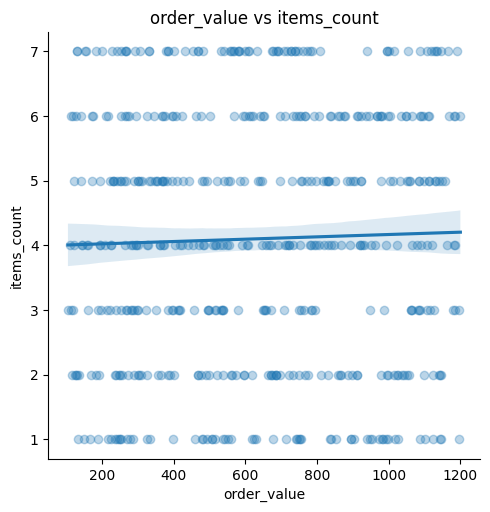

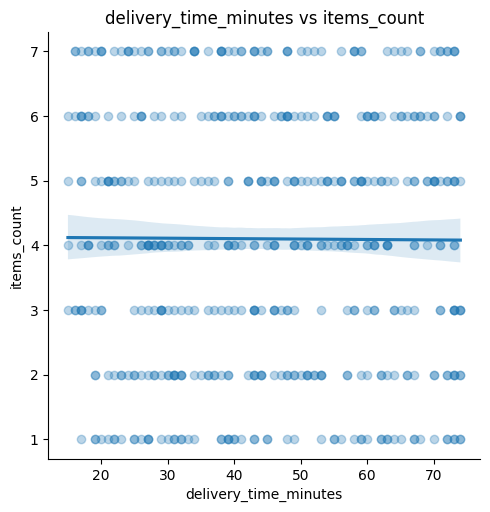

predictions for the loaded inputs are: [4.10410577 4.18581332 3.99774187 4.09336798 4.01916823 4.1668582
 4.1228868  4.12259869 4.10589298 4.09514026 4.13256208 4.12842143
 4.05871098 4.05486338 4.16689881 4.0875319  4.04567384 4.08194028
 4.06276271 4.14466046 4.13669482 4.02158486 4.09931257 4.0743898
 4.02453644 4.01768988 4.08764911 4.02063327 4.10152083 4.15253673
 4.07981079 4.00639976 4.18152545 4.04432481 4.04772892 4.19204488
 4.18048087 4.02208395 4.08849945 4.05985514 4.03753355 4.18686237
 4.18521584 4.11728458 4.16831319 4.12737561 4.18208893 4.02005995
 4.19362947 4.06706067 4.05688202 4.201925   4.07616527 4.069688
 4.01822786 4.01253628 4.03618019 4.03681945 4.03330418 4.17418293
 4.11816415 4.09016584 4.01332626 4.04224079 4.18353803 4.03652883
 4.07307542 4.11303921 4.17053355 4.08482344 4.09980823 4.0848562
 4.12013482 4.09366435 4.03234705 4.17011244 4.09054493 4.1790166
 4.10941258 4.19229098 4.01026181 4.07474453 4.11301195 4.0745961
 4.15576915 4.19031556 4.15988

d:\miniconda\envs\Apramad-workspace\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


# Define features and target
X = df[['order_value', 'delivery_time_minutes']]
y = df['items_count']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Print regression info
print("Intercept:", model.intercept_)
print("Coefficient (order_value):", model.coef_[0])
print("Coefficient (delivery_time_minutes):", model.coef_[1])

# Evaluation of model 
print("R² Score:", r2_score(y,y_pred))

# Plot 1: Order Value vs Number of Items
sns.lmplot(x='order_value', y='items_count', data=df, scatter_kws={'alpha': 0.3})
plt.title('order_value vs items_count')
plt.xlabel('order_value')
plt.ylabel('items_count')
plt.show()

# Plot 2: Delivery Time vs Number of Items
sns.lmplot(x='delivery_time_minutes', y='items_count', data=df, scatter_kws={'alpha': 0.3})
plt.title('delivery_time_minutes vs items_count')
plt.xlabel('delivery_time_minutes')
plt.ylabel('items_count')
plt.show()

# Predictions
print("predictions for the loaded inputs are:", y_pred)

try:
    # Get input from the user for order_value and delivery_time_minutes
    a = float(input("Enter the order value: "))
    b = float(input("Enter the delivery time in minutes: "))

    # Make prediction using the model
    prediction = model.predict(np.array([[a, b]]))
    print("Predicted number of items:", prediction[0])
except ValueError:
    print("Invalid input. Please enter numeric values.")
except Exception as e:
    print(f"An error occurred: {e}")

Performance Analysis and Limitations:
As we can see our model has R-squared score of 0.0008570461251036221 which is not as good. Means our model is not performing much better as we expected. Since our model is using linear regression, it can't be used for data having containing more features like text data that is to be loaded bidirectional RNNs contains semantic relationships. It can be used only for simple numeric data.

Ethical Considerations and Responsible AI:
As the dataset contains the different types of food Bakery, Chinese, Fast food, Healthy, Italian, Mexican, North Indian and South Indian. Hence our model is not biased to a particular type of cuisine.

However our dataset contains the data only throughout one year and hence model needs to be updated with new data to work efficiently as food trend changes with the time.Since it contains the data colelcted throughout one year only, the data is short for building highly accurate model.

The model only takes order value and delivery time and predicts only number of items. It doesn't use any kind of personal information of user. Though the model can predict the number of items that can be bought, shopkeeper should make the final decision regarding managing the inventory being aware that any kind of health related, social, emotional and cultural inconvinience must not be happened.

Conclusion and Future Scope:
As this model has 0.0008 R-squared score, our model could not reach our expectations much. It can be due to underfitting or features incapable of making relations with output.

Advanced data can be helpful in not only predicting the oeder value but based on a month, season could predict the dish which can have much demand. Which can help to gain exact knowledge of food trend. 